In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy

import model
from model import ThermochemicalStorageSingleNode

Model Imported Successfully!


# Perform simple calculation


In [2]:
# Path to your Excel file with input-parameters
path_to_params = "parameters_01.xlsx"

# Read default parameters from Excel
params_df = pd.read_excel(path_to_params, index_col=0)
params_dict = params_df.to_dict()["Value"]

# initialize model
model = ThermochemicalStorageSingleNode(params_dict)

# run model
results_a = model.run_absorption()
results_d = model.run_desorption()

# Perform parameter variation

In [6]:
# Path to your Excel file with parameters
path_to_params = "parameters_01.xlsx"

# Read default parameters from Excel
params_df = pd.read_excel(path_to_params, index_col=0)
params_dict = params_df.to_dict()["Value"]

# initialize model
model = ThermochemicalStorageSingleNode(params_dict)

# set up variable to vary
m_sol_in = np.linspace(10, 70, 100)

# transform from ml/min to kg/s
rho = 1.52 # kg/l
m_sol_in = m_sol_in / 1000 * rho / 60

# run model
res = model.single_parameter_variation("m_sol_in",  # --> parameter name in model (compare excel file)
                                       m_sol_in,    # --> array of parameter values (does not need to have same name)
                                       mode="absorption",
                                       plot_variable="Q_AD",
                                       editable_plot=True)
# edit plot (optional)
plt.title("Power of Absorption")
plt.ylabel("Q_AD [W]")
plt.xlabel("m_sol_in [kg/s]")
# show plot (only necessary if editable_plot==True)
plt.show()

# Perform variation of two parameters

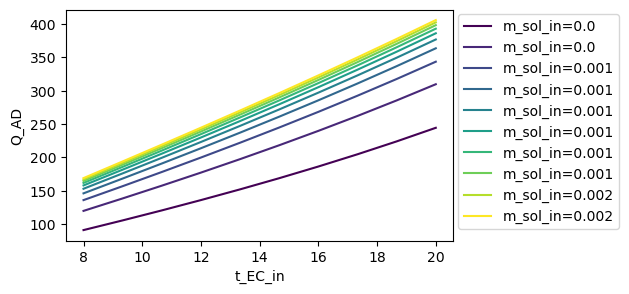

In [12]:
# Path to your Excel file with parameters
path_to_params = "parameters_01.xlsx"

# Read default parameters from Excel
params_df = pd.read_excel(path_to_params, index_col=0)
params_dict = params_df.to_dict()["Value"]

# initialize model
model = ThermochemicalStorageSingleNode(params_dict)

# set up variable to vary
m_sol_in = np.linspace(10, 70, 10)
t_EC_in  = np.linspace(8, 20, 10)

# transform from ml/min to kg/s
rho = 1.52 # kg/l
m_sol_in = m_sol_in / 1000 * rho / 60

# run model
res = model.two_parameters_variation("m_sol_in", m_sol_in,
                                    "t_EC_in", t_EC_in,
                                    mode="absorption",
                                    plot_variable="Q_AD",
                                    editable_plot=False)
plt.show()